<!--NOTEBOOK_HEADER-->
*This notebook contains material from [cbe30338-2021](https://jckantor.github.io/cbe30338-2021);
content is available [on Github](https://github.com/jckantor/cbe30338-2021.git).*


<!--NAVIGATION-->
< [7.1 Introduction to Simpy](https://jckantor.github.io/cbe30338-2021/07.01-Introduction-to-Simpy.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.3 Chemotaxis](https://jckantor.github.io/cbe30338-2021/07.03-Chemotaxis.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/07.02-Ready-to-Roomba.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/07.02-Ready-to-Roomba.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>

# 7.2 Ready to Roomba

In [79]:
import simpy

def roomba(name):
    print(f"{env.now:3d}: {name} starts cleaning.")
    yield env.timeout(20)
    print(f"{env.now:3d}: {name} battery dies.")
        
env = simpy.Environment()
env.process(roomba("A"))
env.run()

  0: A starts cleaning.
 20: A battery dies.


 35: 0 start charging.
 40: 0 finished charging.
 40: 1 start charging.
 45: 1 finished charging.
 45: 2 start charging.
 50: 2 finished charging.
 50: 3 start charging.
 55: 3 finished charging.
 55: 4 start charging.
 60: 4 finished charging.
 60: 5 start charging.
 65: 5 finished charging.
 65: 6 start charging.
 70: 6 finished charging.
 70: 7 start charging.
 75: 7 finished charging.
 75: 8 start charging.
 80: 8 finished charging.
 80: 9 start charging.
 85: 9 finished charging.
 85: 10 start charging.
 90: 10 finished charging.
 90: 11 start charging.
 95: 11 finished charging.
 95: 12 start charging.
100: 12 finished charging.
100: 13 start charging.
105: 13 finished charging.
105: 14 start charging.
110: 14 finished charging.
110: 15 start charging.
115: 15 finished charging.
115: 16 start charging.
120: 16 finished charging.
120: 17 start charging.
125: 17 finished charging.
125: 18 start charging.
130: 18 finished charging.
130: 19 start charging.
135: 19 finished charging.


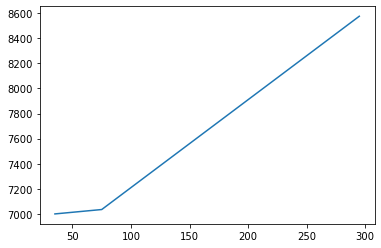

In [102]:
import simpy
import matplotlib.pyplot as plt

total_cleaning_time =  0
cleaning = {}

def roomba(name, battery):
    global cleaning, total_cleaning_time
    while True:
        start = env.now
        #print(f"{start:3d}: {name} starts cleaning.")
        yield env.timeout(battery)
        
        stop = env.now
        #print(f"{stop:3d}: {name} stops cleaning.")
        total_cleaning_time = total_cleaning_time + stop - start
        cleaning[env.now] = total_cleaning_time
        
        request = charger.request()
        yield request
        
        print(f"{env.now:3d}: {name} start charging.")
        yield env.timeout(5)
        print(f"{env.now:3d}: {name} finished charging.")
        
        charger.release(request)
        
env = simpy.Environment()
charger = simpy.Resource(env, capacity=1)
for n in range(200):
    env.process(roomba(n, 35))
env.run(until=300)

print(cleaning)
plt.plot(cleaning.keys(), cleaning.values())

<!--NAVIGATION-->
< [7.1 Introduction to Simpy](https://jckantor.github.io/cbe30338-2021/07.01-Introduction-to-Simpy.html) | [Contents](toc.html) | [Tag Index](tag_index.html) | [7.3 Chemotaxis](https://jckantor.github.io/cbe30338-2021/07.03-Chemotaxis.html) ><p><a href="https://colab.research.google.com/github/jckantor/cbe30338-2021/blob/master/docs/07.02-Ready-to-Roomba.ipynb"> <img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open in Google Colaboratory"></a><p><a href="https://jckantor.github.io/cbe30338-2021/07.02-Ready-to-Roomba.ipynb"> <img align="left" src="https://img.shields.io/badge/Github-Download-blue.svg" alt="Download" title="Download Notebook"></a>